## Fire in the nature park

***Problem Summary***

The administration of the nature park Montesinho in north-east Portugal wants to predict wild fires based on wheather data of the Fire-Wheather-Index (FWI). The aim is to recognize the affected area and consequently the intensity of the imminent wild fire as early as possible in order to be able to adequatly assess the danger caused by the fire. To this aim, data from 517 wild fires have been collected. The features are summarized below

***Features***

- X (X-coordinate of the fire in the park: 1 to 9)
- Y (Y-coordinate of the fire in the park: 2 to 9)
- Month month: ”jan“ to ”dec“)
- day (day: ”mon“ bis ”sun“)
- FFMC (FFMC index of the FWI system: 18.7 to 96.2)
- DMC (DMC index of the FWI system: 1.1 bis 291.3)
- DC (DC index of the system: 7.9 bis 860.6)
- ISI (ISI index of the FWI systems: 0.0 to 56.1)
- temp (temperature in degrees Celsius: 2.2 to 33.3)
- RH (relative humidity in %: 15 to 100)
- wind (wind velocity in km/h: 0.4 to 9.4)
- rain (rainfall in mm/m2: 0.0 to 6.4)
- **area (forest area that has been burnt in hectare: 0.09 to 1090.84)**

***Goal***

Predict **area** that has been burnt in hectare

Load the data into Python and preprocess them appropriately; perform an adequate normalization of the features. For example, he label area is distributed very non-uniformly such that a transformation such as area0 = log(1 + area) is appropriate. Identify and implement a suitable learning method in Python. Train and evaluate the model. Propose a trivial baseline model with which you can compare your model’s performance. Provide the RMSE (root mean square error) of your model and the baseline model obtained with 10-fold cross-validation. Provide a short documentation and motivation of each of your steps.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [11]:
Path="C:\\Users\\bsubramani\\Downloads\\Python Scripts\\ML Project\\"
Path="C:\\Users\\Dell\\Documents\\Python Scripts\ML\\ML Project\\"
Filename=Path+'fires.csv'
Data=pd.read_csv(Filename)

In [12]:
###### Functions

def renames(feature='day', nbr=12):
    Dict_cols={}
    for i in range(nbr):
        Dict_cols[i]=feature+str(i)
    return Dict_cols
    

In [4]:
Data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
Data.columns

Index([u'X', u'Y', u'month', u'day', u'FFMC', u'DMC', u'DC', u'ISI', u'temp',
       u'RH', u'wind', u'rain', u'area'],
      dtype='object')

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
Data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


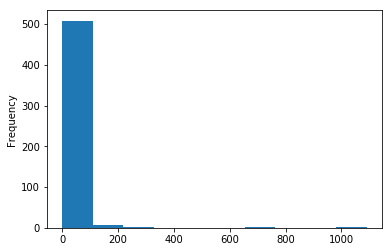

In [8]:
# Fired area in hitogram
Data["area"].plot(kind='hist', bins=10)

In [13]:
# Log Transformation
Data["area"]=[0 if np.isinf(x) else x for x in Data["area"].apply(np.log+1)]

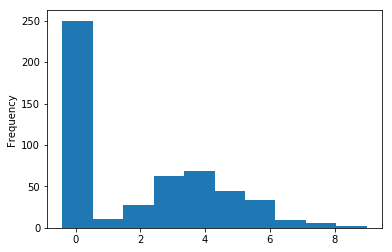

In [14]:
Data["area"].plot(kind='hist', bins=10)

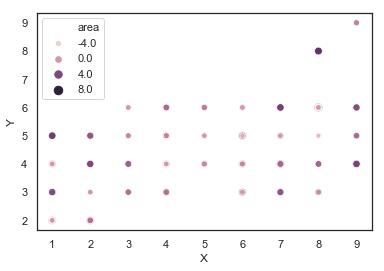

In [75]:
sns.scatterplot(x='X', y='Y',size='area', hue='area', data=Data)

In [86]:
#Data['X']=Data['X'].astype('object', copy=True)
#Data['Y']=Data['Y'].astype('object', copy=True)
#Data['month']=Data['month'].astype('object', copy=True)
#Data['day']=Data['day'].astype('object', copy=True)

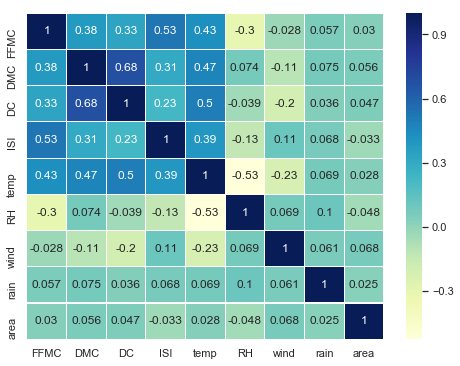

In [87]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain', 'area']
cm = np.corrcoef(Data[ncols].values.T) 
f, ax = plt.subplots(figsize =(8, 6)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,linewidths = 0.1, yticklabels = ncols,xticklabels = ncols) 

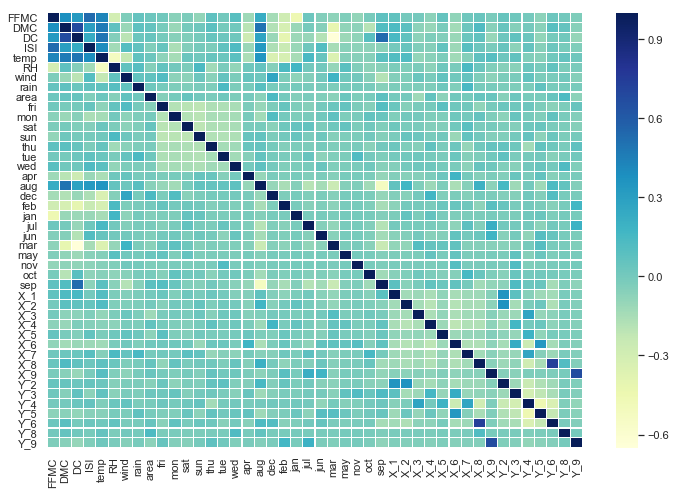

In [88]:
ncols=Encoded_Data.columns
cm = np.corrcoef(Encoded_Data.values.T) 
f, ax = plt.subplots(figsize =(12, 8)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=False,linewidths = 0.1, yticklabels = ncols,xticklabels = ncols) 

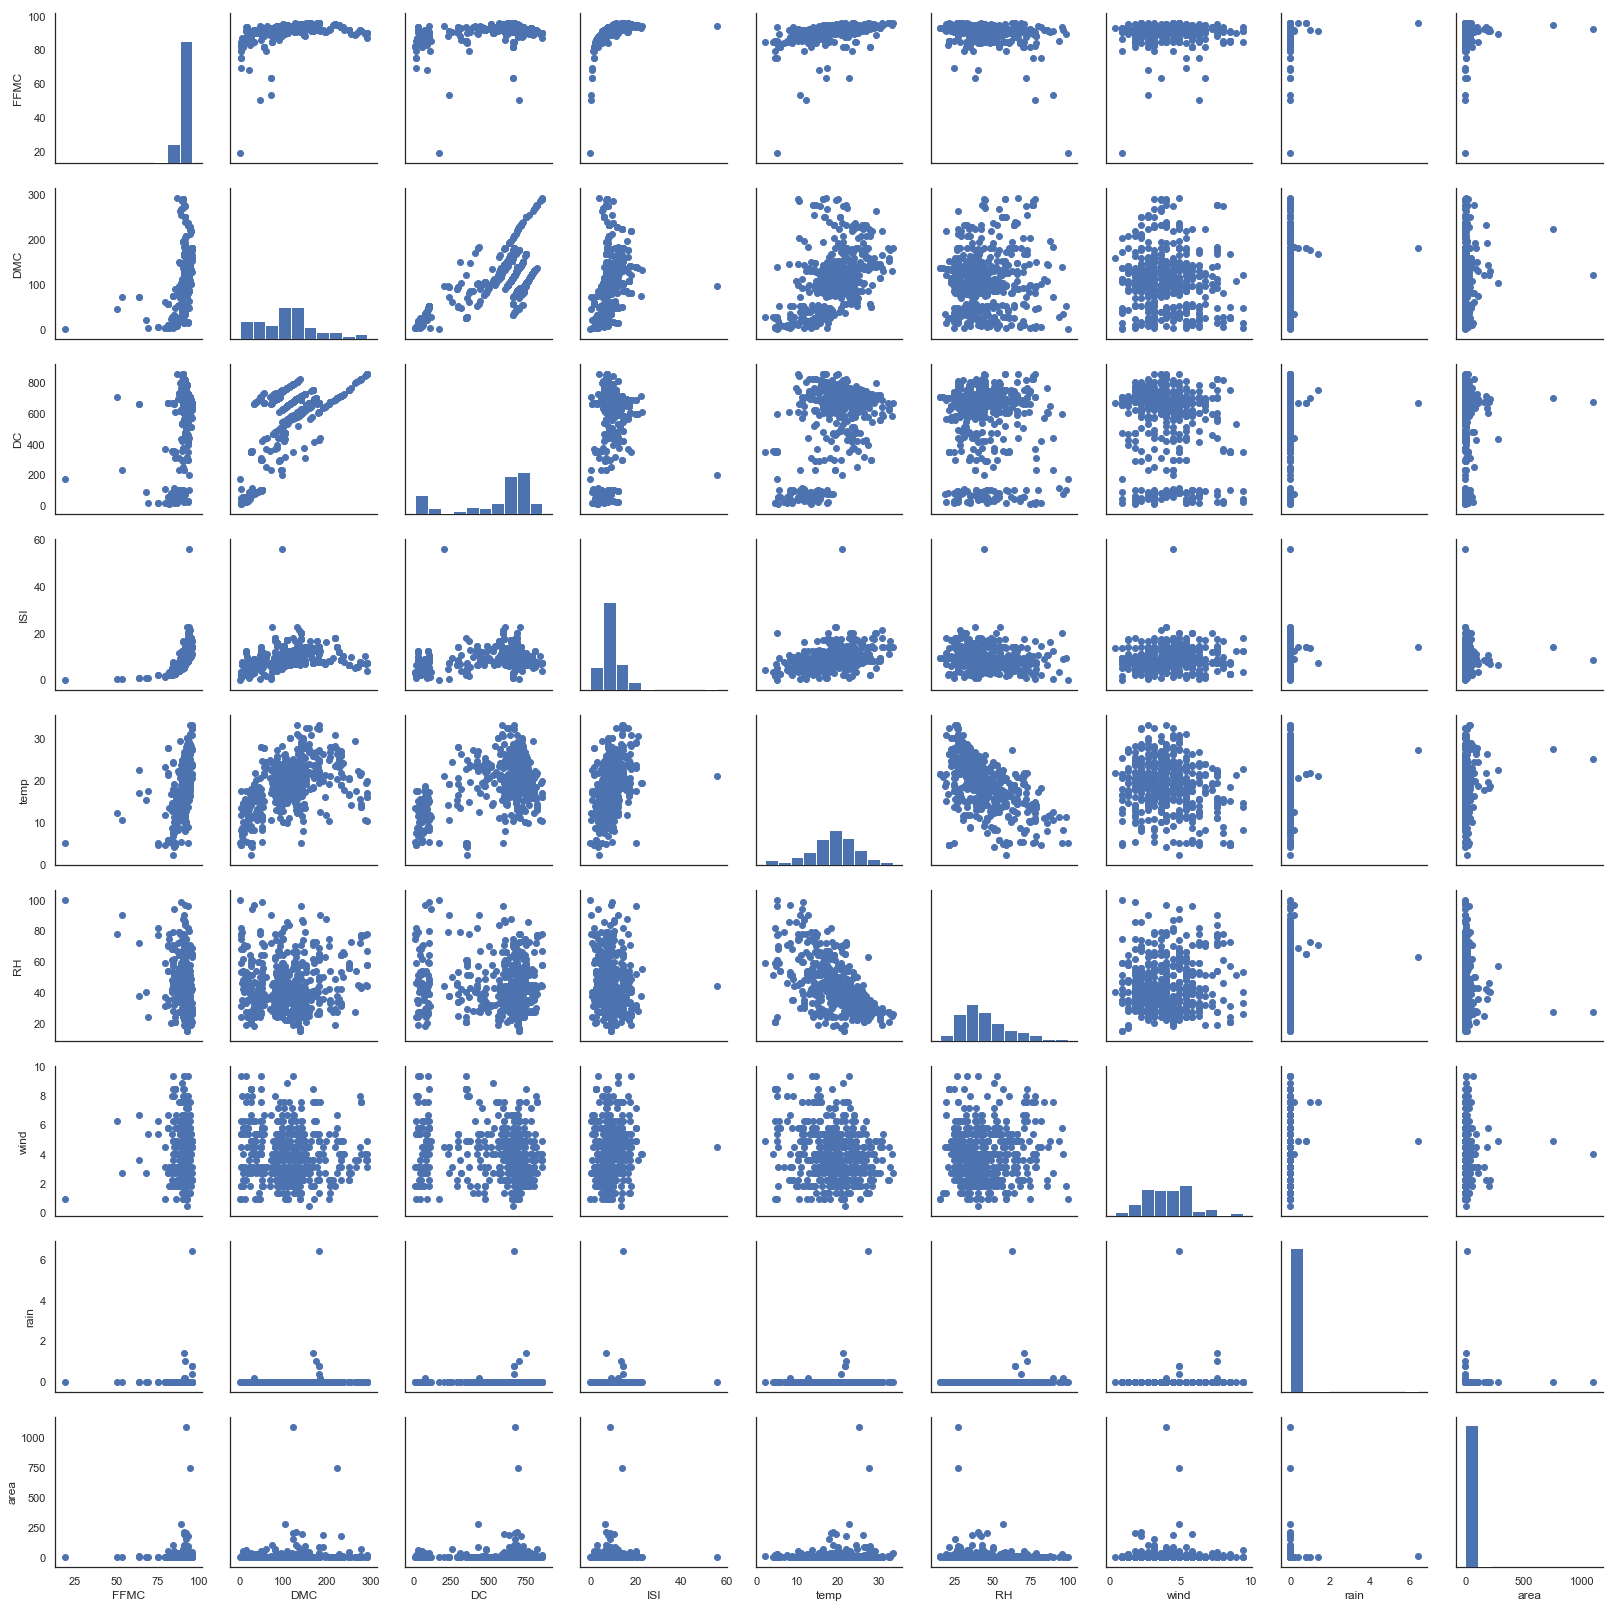

In [8]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain',"area"]
sns.set(style="white")

g = sns.PairGrid(Data[ncols])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

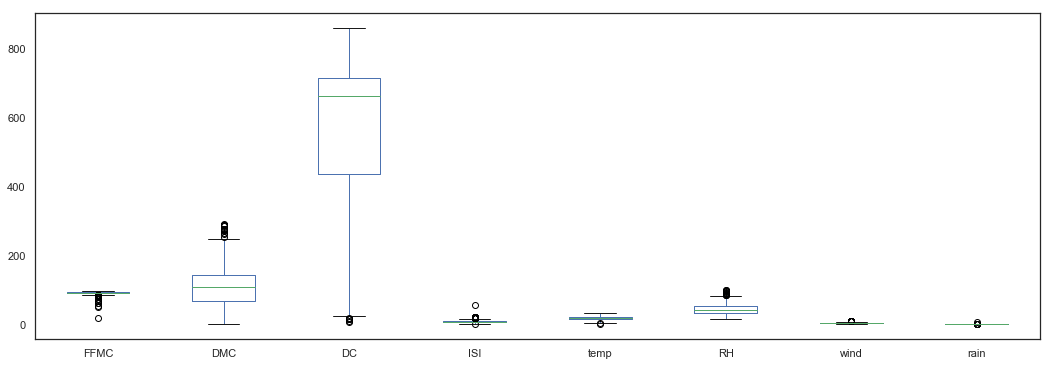

In [90]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
Data[ncols].plot(kind="box", figsize=(18,6))

In [91]:
allcols=['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']

ztrans_data=Data[['X', 'Y', 'month', 'day']]
col_zscores=[]

for col in ncols:
    col_zscore = col + '_zscore'
    ztrans_data[col_zscore] = (Data[col] - Data[col].mean())/Data[col].std(ddof=0)
    col_zscores.append(col_zscore)

In [100]:
for col in ncols:
    print(col+ ' column has  '+str(len(Data[np.abs(ztrans_data[col+"_zscore"])>3][col]))+" outliers")
    Data[np.abs(ztrans_data[col+"_zscore"])>3][col]=Data[col].median()

FFMC column has  7 outliers
DMC column has  0 outliers
DC column has  0 outliers
ISI column has  2 outliers
temp column has  0 outliers
RH column has  5 outliers
wind column has  4 outliers
rain column has  3 outliers


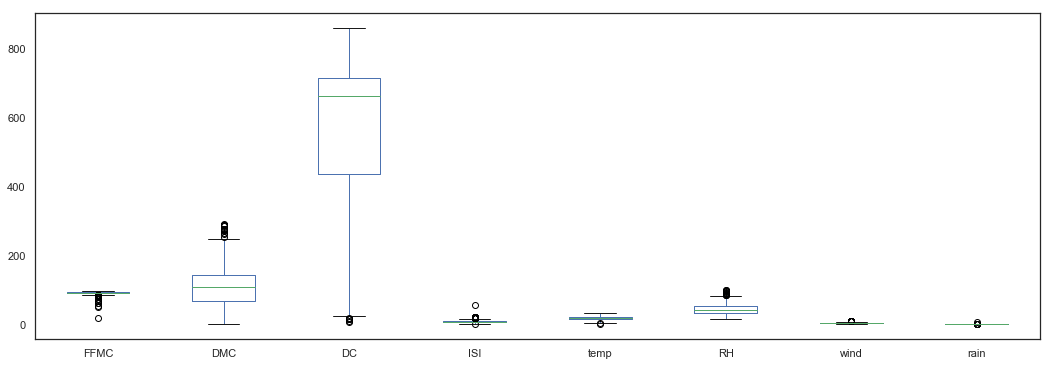

In [97]:
Data[ncols].plot(kind="box", figsize=(18,6))

In [104]:
#Encoding the categorical columns
dummies= pd.get_dummies(Data['day'])
Encoded_Data=Data.join(dummies)
#Data1=Data1.rename(index=str, columns=renames('day_',Data['day'].max()+1))

dummies= pd.get_dummies(Data['month'])
Encoded_Data=Encoded_Data.join(dummies)
#Data1=Data1.rename(index=str, columns=renames('month_',Data['month'].max()+1))

dummies= pd.get_dummies(Data['X'])
Encoded_Data=Encoded_Data.join(dummies)
Encoded_Data=Encoded_Data.rename(index=str, columns=renames('X_',Data['X'].max()+1))

dummies= pd.get_dummies(Data['Y'])
dummies=dummies.rename(index=str, columns=renames('Y_',Data['Y'].max()+1))
Encoded_Data=Encoded_Data.join(dummies)

Encoded_Data=Encoded_Data.drop(columns=['day','month','X','Y'])

#print(Encoded_Data.columns)
#Encoded_Data.head()

Encod_ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'fri','mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'dec', 'feb','jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2',       'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4',       'Y_5', 'Y_6', 'Y_8', 'Y_9']

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'fri',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2',
       'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4',
       'Y_5', 'Y_6', 'Y_8', 'Y_9'],
      dtype='object')


In [162]:
X_train, X_test, y_train, y_test = train_test_split(Encoded_Data[Encod_ncols], Encoded_Data["area"],  test_size=0.40, random_state=0)

In [161]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

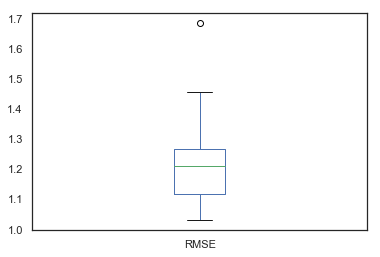

In [159]:
scores = cross_val_score(model, Encoded_Data[Encod_ncols], Encoded_Data["area"], cv=10, scoring="neg_mean_squared_error")
scores=np.sqrt(abs(scores))
pd.Series(np.sqrt(scores) ).plot(kind="box", label="RMSE")

In [171]:
X_train, X_test, y_train, y_test = train_test_split(Data[ncols], Data["area"],  test_size=0.40, random_state=0)

In [172]:
from sklearn import tree
model2 = tree.DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

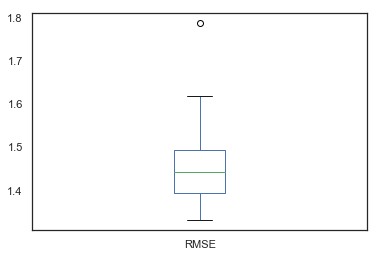

In [174]:
scores = cross_val_score(model2, Data[ncols], Data["area"], cv=10, scoring="neg_mean_squared_error")
scores=np.sqrt(abs(scores))
pd.Series(np.sqrt(scores) ).plot(kind="box", label="RMSE")

In [177]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

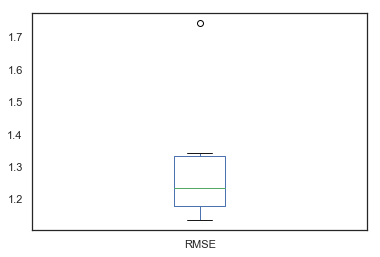

In [178]:
scores = cross_val_score(model3, Data[ncols], Data["area"], cv=10, scoring="neg_mean_squared_error")
scores=np.sqrt(abs(scores))
pd.Series(np.sqrt(scores)).plot(kind="box", label="RMSE")

In [197]:
y_pred=model3.predict(X_test)
model3.score(y_pred,y_test)
y_test.shape

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.0011725   1.2201533   1.4350361   2.2895021   0.82400894  0.7154888
  1.0693839   0.37444818  0.5073218   1.0832388   0.538851    2.430105
  0.35682032  0.58889645  1.8248922   0.6010064   0.4468198   0.40512973
  1.163576    1.4324962   1.1296203   0.9936924   2.9050074   1.333963
  1.6646767   0.82635915  0.20756003  0.90975994  1.7904944   0.60614574
  0.97525656  1.3520647   1.1239898   0.0584029   3.0055494   0.
  0.1798404   0.15396723  0.53150475  1.1501092   1.5191491   0.727876
  0.23507772  0.65167385  0.30457884  0.          2.1175952   0.6529726
  0.27392095  1.2260654   0.03201977  1.9247494   1.5451819   0.79930526
  1.4848319   0.03080728  1.0733657   0.14090505  0.30510005  1.4873933
  0.54902726  0.6427767   0.85129154  0.3148728   1.2529292   1.1460284
  0.67202973  1.6406597   0.8919642   0.28789434  1.7429103   0.95779777
  0.08417827  0.5998915   0.52630544  1.0600222   2.044274    0.6247217
  0.56657356  1.3249623   0.15464425  1.8535014   0.51859623  1.0803695
  0.49953592  1.5191491   1.246134    1.1785897   0.95823133  1.6174638
  1.1820674   0.3167144   2.379919   -0.04103922  0.66724515  0.90975994
  0.96418154  0.64629257  0.30065045  0.55891466  3.0011725   0.
  1.9547584   0.62000483  0.92746806  1.3721402   1.0448911   0.71111244
  1.7912114   0.          0.9705073   1.0406938   0.          0.69945484
  1.2190061   1.9295524   1.9872805   0.7436979   1.2458347   0.8952264
  0.          1.0390122   0.6646858   2.4958572   0.          0.6135582
  0.26892242  0.45253104  0.82270634  0.27861774  1.6671287   1.0335175
  0.8202906   0.6981803   1.221964   -0.09368914  0.7347309   0.4111691
  0.2385749   0.44834906  0.9273357   0.39217898  0.33779648  3.1621253
  1.2331057   0.          0.28755987  0.2736929   0.406007    0.04946962
  0.6219397   0.          0.          0.51679397  1.5140234   1.6842041
  1.3807367   0.38156965  0.38538533  0.6790178   0.47933227  0.4366306
  0.9757576  -0.59316635  0.          4.690311    1.2715086   2.2895021
  0.8507467   1.153316    0.3377813   1.0301174   0.4835556  -0.42306188
  0.6260183   1.8515627   1.5119562   1.3871865   1.1820674   0.6924472
  0.9152917   0.6811812   0.7174739   2.0399828   0.24419121  0.0422912
  1.484655    0.89558345  1.0653034   0.27861774  1.8732678   0.21488276
  1.4388773   0.7520522   0.84818465  0.9644525   0.71111244  0.06323265
  0.8931117   0.60632145  1.342201    1.1785897   2.430105    0.
  0.48113272  0.779251    0.8801619 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.